In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics
from mpl_toolkits.mplot3d import *
from regressors import stats
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('dry_bean.csv')
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [3]:
df.drop_duplicates(inplace=True)
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

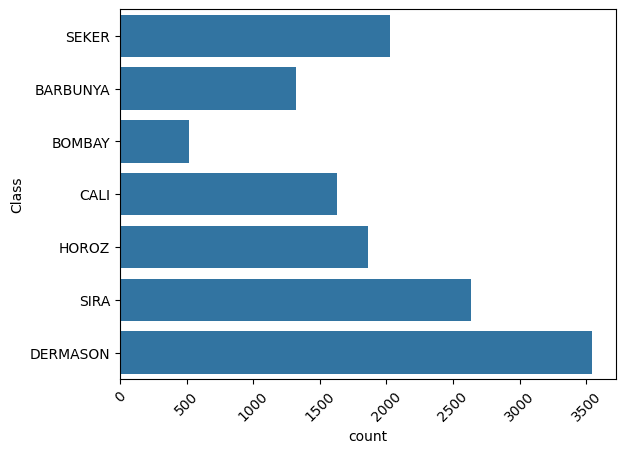

In [4]:
sns.countplot(df['Class'])
plt.xticks(rotation =45)
plt.show()

In [5]:
print("par trabajar con igual cantidad de datos para cada especie de frijol haremos una reescala a los datos con menor cantidad")
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state=42)

par trabajar con igual cantidad de datos para cada especie de frijol haremos una reescala a los datos con menor cantidad


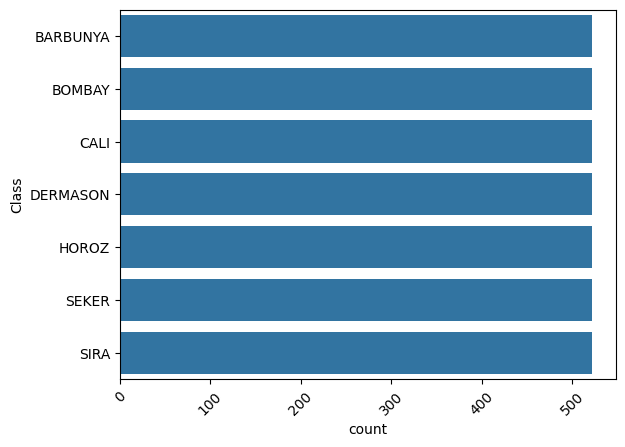

In [6]:
x=df.drop('Class', axis=1)
y = df.Class
x_over, y_over = under_sample.fit_resample(x,y)
sns.countplot(y_over)
plt.xticks(rotation =45)
plt.show()

In [7]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [8]:
y_over=y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],[1,2,3,4,5,6,7])
y_over

/tmp/ipykernel_94075/1967094008.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_over=y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],[1,2,3,4,5,6,7])


2754    1
2506    1
2267    1
2449    1
2076    1
       ..
8692    7
7578    7
7924    7
9972    7
9720    7
Name: Class, Length: 3654, dtype: int64

analisamos los datos

In [39]:
print("eliminamos las variables que estan fuertemenete relacionadas ya que no aportan mayor valor a ajuste")
df_2 = x_over.copy()
df_2['Class']=y_over
df_2.head()

eliminamos las variables que estan fuertemenete relacionadas ya que no aportan mayor valor a ajuste


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2754  70776   1060.894       386.619944       234.100208      1.651515   
2506  66370   1004.139       339.287072       249.883085      1.357783   
2267  60736    985.501       342.445302       226.741775      1.510288   
2449  65219   1011.110       353.650546       235.308999      1.502920   
2076  51332    889.637       330.822804       198.618899      1.665616   

      Eccentricity    Extent  Solidity  roundness  Compactness  ShapeFactor1  \
2754      0.795842  0.775763  0.983300   0.790227     0.776451      0.005463   
2506      0.676443  0.720536  0.981268   0.827169     0.856789      0.005112   
2267      0.749393  0.789353  0.984695   0.785854     0.812058      0.005638   
2449      0.746512  0.719436  0.978207   0.801654     0.814831      0.005423   
2076      0.799716  0.751688  0.981811   0.815028     0.772776      0.006445   

      ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
2754      0.001225      0.602875      0.995658      1  
2506      0.001699      0.734087      0.996731      1  
2267      0.001512      0.659438      0.995941      1  
2449      0.001475      0.663950      0.997864      1  
2076      0.001418      0.597183      0.994678      1

para esto evaluamos los coeficientes de correlación


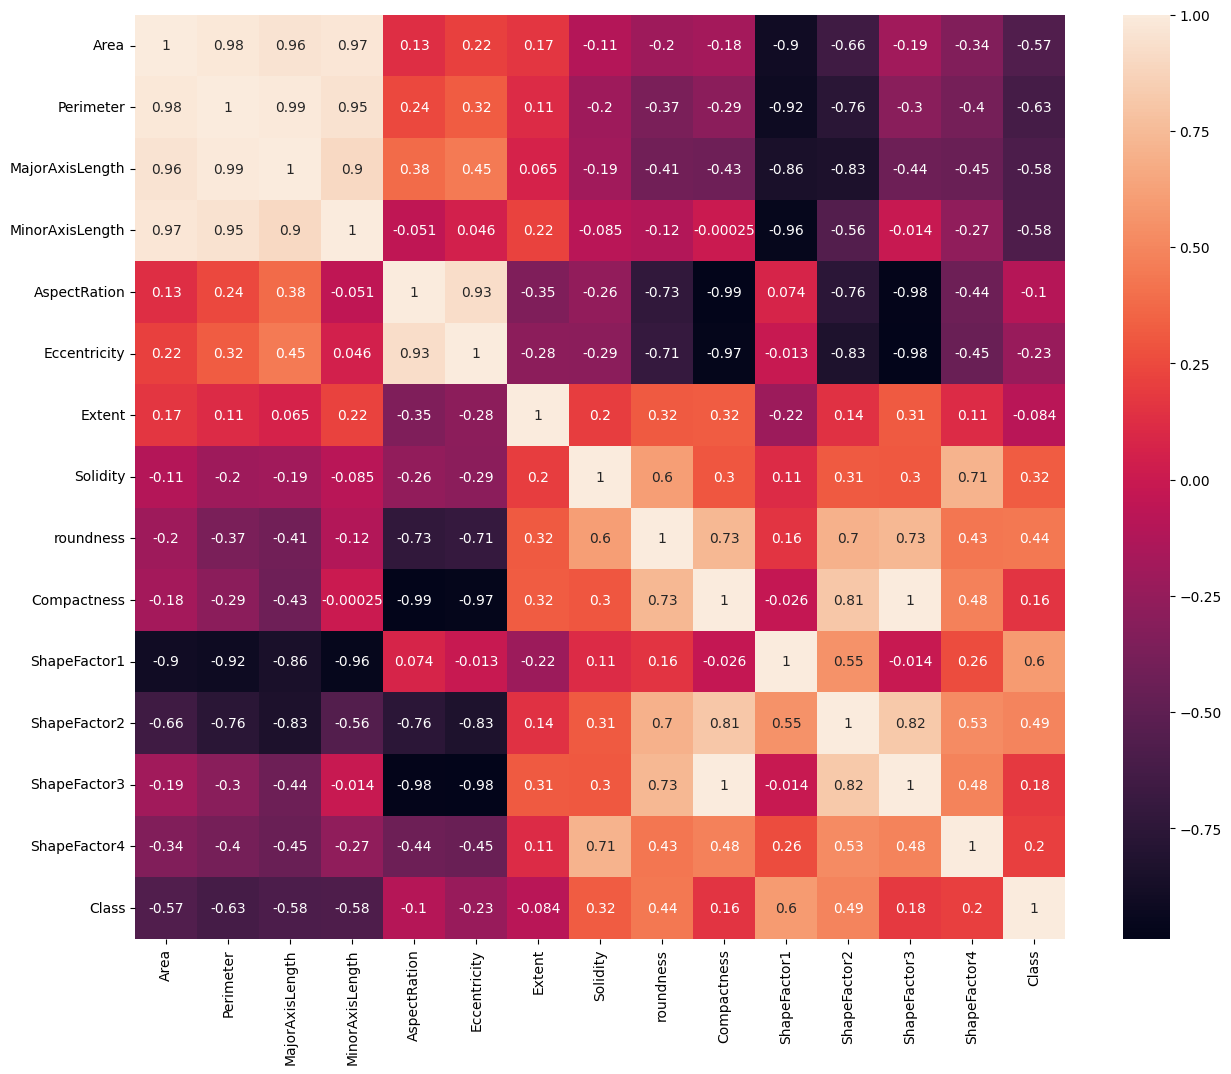

por lo que decidimos eliminar los coeficientes ligados como el área y el perimetro, o diametro


In [16]:
print("para esto evaluamos los coeficientes de correlación")
plt.figure(figsize=(15,12))
sns.heatmap(df_2.corr(), annot=True)
plt.show()
print("por lo que decidimos eliminar los coeficientes ligados como el área y el perimetro, o diametro")

In [37]:
df_2.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2754  70776   1060.894       386.619944       234.100208      1.651515   
2506  66370   1004.139       339.287072       249.883085      1.357783   
2267  60736    985.501       342.445302       226.741775      1.510288   
2449  65219   1011.110       353.650546       235.308999      1.502920   
2076  51332    889.637       330.822804       198.618899      1.665616   

      Eccentricity    Extent  Solidity  roundness  Compactness  ShapeFactor1  \
2754      0.795842  0.775763  0.983300   0.790227     0.776451      0.005463   
2506      0.676443  0.720536  0.981268   0.827169     0.856789      0.005112   
2267      0.749393  0.789353  0.984695   0.785854     0.812058      0.005638   
2449      0.746512  0.719436  0.978207   0.801654     0.814831      0.005423   
2076      0.799716  0.751688  0.981811   0.815028     0.772776      0.006445   

      ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
2754      0.001225      0.602875      0.995658      1  
2506      0.001699      0.734087      0.996731      1  
2267      0.001512      0.659438      0.995941      1  
2449      0.001475      0.663950      0.997864      1  
2076      0.001418      0.597183      0.994678      1

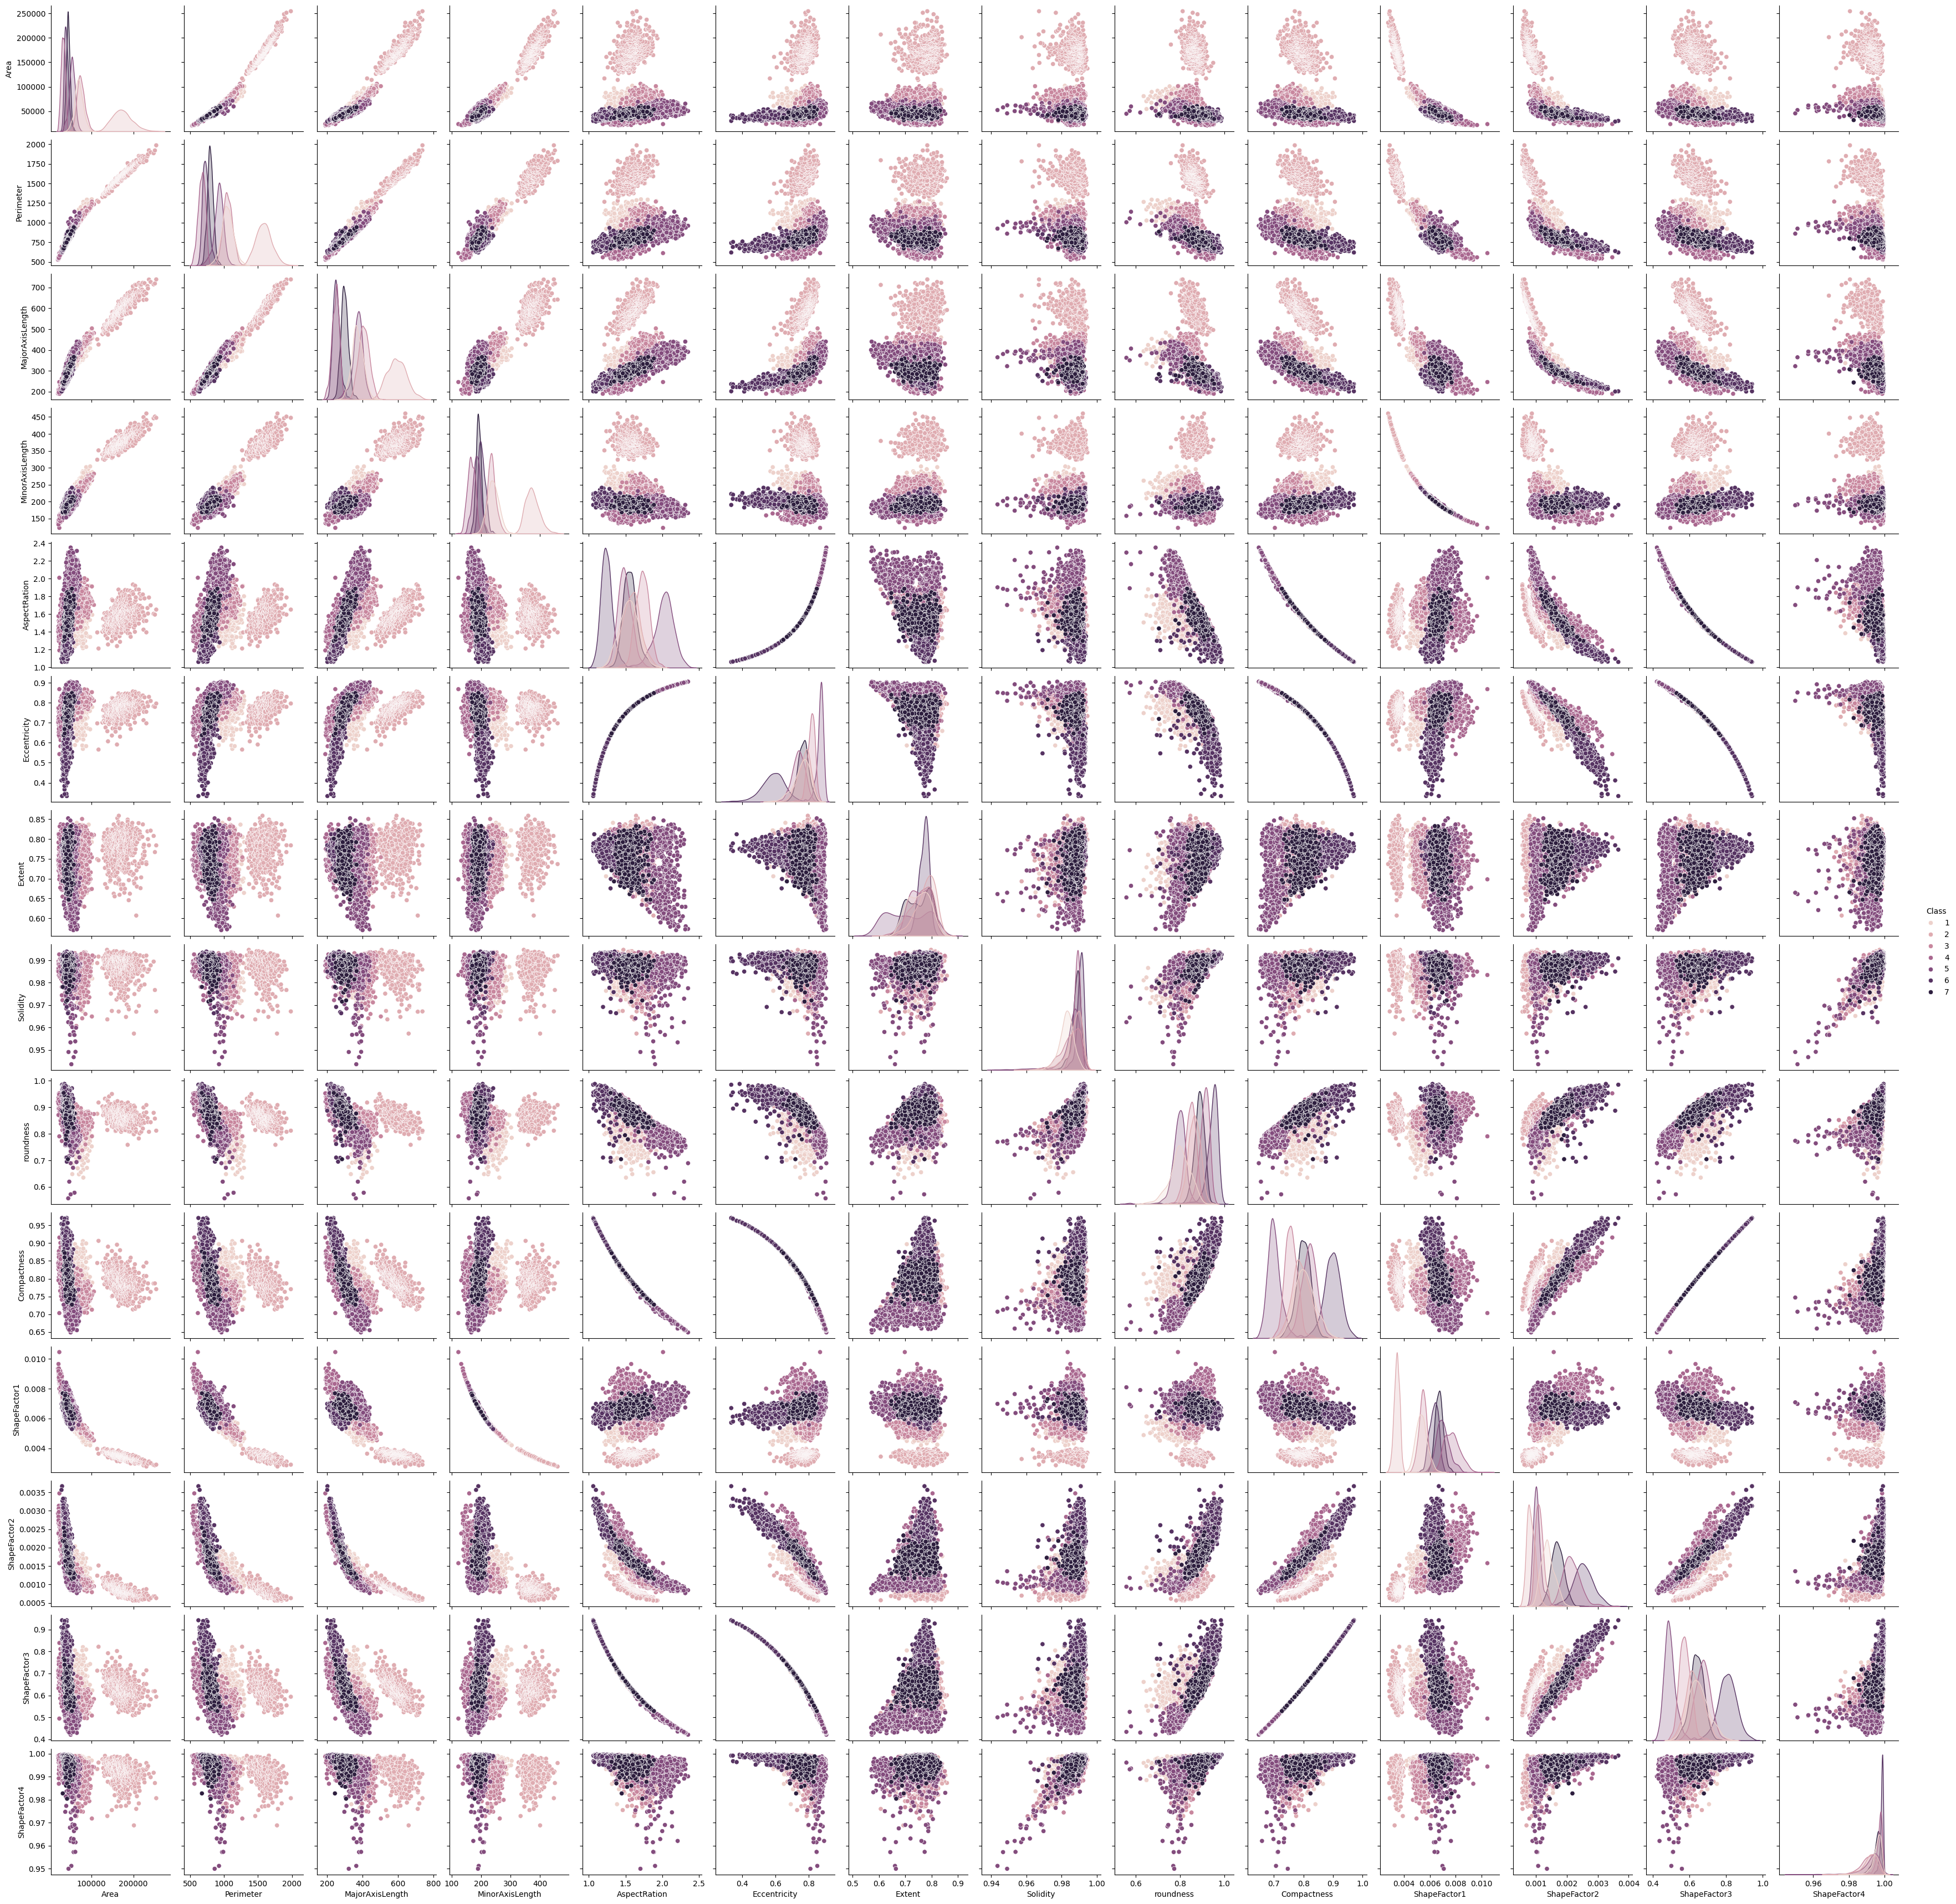

In [12]:
#sns.pairplot(df_2, hue='Class')

In [43]:

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, random_state=42, shuffle=True, test_size=0.2 )

In [44]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [45]:
def log_model (C_, solver_, multiclass_):
    log_model_regre = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_)
    return log_model_regre

In [46]:
model = log_model(1,'saga', 'multinomial')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  89   2]
 [  0   0   0   0   0   0 110]]
0.9931600547195623


/home/paolovf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/paolovf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [52]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(model, x_over, y_over, cv=cv, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)

/home/paolovf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/paolovf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/paolovf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/paolovf/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/paolovf/.local/lib/python3.10/site

In [53]:
print(f"RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")
print(f"Standard Deviation of RMSE: {rmse_scores.std()}")

RMSE scores: [2.75641274 2.9256636  2.79950162 2.70278774 3.00319465]
Mean RMSE: 2.8375120699602676
Standard Deviation of RMSE: 0.11080970140194807
